# Project

# Project Name:TweepFake-Twitter deep Fake

# 1. Data collection

# Import Libraries and Load DataSet

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [73]:
df=pd.read_csv('C:/Users/Guru Kiran/Downloads/train.csv.zip')
df

,screen_name,text,account.type,class_type
0,imranyebot,YEA now that note GOOD,bot,others
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


## Encode categorical to numeric for numeric ops

In [74]:
df['account_encoded'] = df['account.type'].map({'human': 0, 'bot': 1})
df

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1
...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0


### ===== NUMPY OPERATIONS =====

## 2.Data Analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   screen_name      20712 non-null  object
 1   text             20712 non-null  object
 2   account.type     20712 non-null  object
 3   class_type       20712 non-null  object
 4   account_encoded  20712 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 809.2+ KB


In [76]:
df.describe()

,account_encoded
count,20712.000000
mean,0.499903
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [77]:
df.head(10)

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1
5,dril,matrix 2: pedaphile killer,human,human,0
6,whalefakes,the world needs more whale stories. I would lo...,bot,gpt2,1
7,imranyebot,the tweet of time I don’t mean It’s got us fre...,bot,others,1
8,ninjasexparty,nobody:\r\n\r\nNSP: penis penis penis penis pe...,human,human,0
9,narendramodi,Had a wonderful interaction with leaders and M...,human,human,0


In [78]:
df.tail(10)

,screen_name,text,account.type,class_type,account_encoded
20702,theJadenTrudeau,Kicking Off The Role in the Same,bot,others,1
20703,theJadenTrudeau,This morning roundtable In 10 Months late King...,bot,others,1
20704,jaden,KOD https://t.co/uIlSGBkoNf,human,human,0
20705,kevinhookebot,"""The recomment for my development of the back ...",bot,rnn,1
20706,zawvrk,kiley wore a hat that my cat peed on LMFAOOOOO,human,human,0
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1


In [79]:
print("\nShape of DataFrame:", df.shape)


Shape of DataFrame: (20712, 5)


In [80]:
df.shape

(20712, 5)

In [81]:
df.isnull().sum()

screen_name        0
text               0
account.type       0
class_type         0
account_encoded    0
dtype: int64

In [82]:
df.columns

Index(['screen_name', 'text', 'account.type', 'class_type', 'account_encoded'], dtype='object')

In [83]:
arr = df[['account_encoded']].to_numpy()

In [84]:
print(arr)

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


### Describe

In [85]:
print(df.describe(include='all'))

          screen_name                    text account.type class_type  \
count           20712                   20712        20712      20712   
unique             40                   20712            2          4   
top     kevinhookebot  YEA now that note GOOD        human      human   
freq             1951                       1        10358      10358   
mean              NaN                     NaN          NaN        NaN   
std               NaN                     NaN          NaN        NaN   
min               NaN                     NaN          NaN        NaN   
25%               NaN                     NaN          NaN        NaN   
50%               NaN                     NaN          NaN        NaN   
75%               NaN                     NaN          NaN        NaN   
max               NaN                     NaN          NaN        NaN   

        account_encoded  
count      20712.000000  
unique              NaN  
top                 NaN  
freq               

### Reshape

In [86]:
reshaped_arr = arr[:10].reshape(5, 2)
print("Reshaped:\n", reshaped_arr)

Reshaped:
 [[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]


## Aggregaion functions

### Mean, Median, Mode

In [87]:
print("Mean:", np.mean(arr))

Mean: 0.499903437620703


In [88]:
df['account_encoded'].agg(['mean','median','max','min','std','sum'])

mean          0.499903
median        0.000000
max           1.000000
min           0.000000
std           0.500012
sum       10354.000000
Name: account_encoded, dtype: float64

In [89]:
print("Median:", np.median(arr))

Median: 0.0


In [90]:
print("Mode:", pd.DataFrame(arr).mode().iloc[0].to_numpy())

Mode: [0]


In [91]:
print("Sum Agg:", np.sum(arr))

Sum Agg: 10354


In [92]:
print("Mean Agg:", np.mean(arr))

Mean Agg: 0.499903437620703


### Std

In [93]:
print("Std:", np.std(arr))

Std: 0.4999999906757068


### Sum

In [94]:
print("Sum:", np.sum(arr))

Sum: 10354


### Vectorization

In [95]:
vectorized_arr = arr + 2
vectorized_arr

array([[3],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]], shape=(20712, 1))

### Map

In [96]:
mapped_arr = np.vectorize(lambda x: x * 2)(arr)
mapped_arr

array([[2],
       [0],
       [2],
       ...,
       [2],
       [0],
       [2]], shape=(20712, 1))

### Filter

In [97]:
filtered_arr = arr[arr > np.mean(arr)]
filtered_arr

array([1, 1, 1, ..., 1, 1, 1], shape=(10354,))

### Reduce

In [98]:
from functools import reduce
reduced_sum = reduce(lambda x, y: x + y, arr.flatten())
reduced_sum

np.int64(10354)

### Lambda

In [99]:
lambda_arr = np.array(list(map(lambda x: x * 3, arr.flatten())))
lambda_arr


array([3, 0, 3, ..., 3, 0, 3], shape=(20712,))

## ===== PANDAS OPERATIONS =====

# 3.Data Preprocesing and cleaning

### Create DataFrame

In [100]:
df_new = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df_new

,A,B
0,1,3
1,2,4


### Column add and drop

In [101]:
df["new_col"] = df["account_encoded"] * 2
df

,screen_name,text,account.type,class_type,account_encoded,new_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0


In [102]:
df_dropped_col = df.drop(columns=["new_col"])
df_dropped_col

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1
...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0


### Row add and drop

In [103]:
df_added_row = pd.concat([df, pd.DataFrame([df.iloc[0]])], ignore_index=True)
df_added_row

,screen_name,text,account.type,class_type,account_encoded,new_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
...,...,...,...,...,...,...
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1,2


In [104]:
df_dropped_row = df.drop(index=0)
df_dropped_row

,screen_name,text,account.type,class_type,account_encoded,new_col
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
5,dril,matrix 2: pedaphile killer,human,human,0,0
...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0


### Map

In [105]:
df["mapped_col"] = df["account_encoded"].map(lambda x: x * 2)
df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2
...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0


### Filter

In [106]:
df_filtered = df[df["account_encoded"] > np.mean(df["account_encoded"])]
df_filtered

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2
6,whalefakes,the world needs more whale stories. I would lo...,bot,gpt2,1,2,2
...,...,...,...,...,...,...,...
20705,kevinhookebot,"""The recomment for my development of the back ...",bot,rnn,1,2,2
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2


### Reduce

### Lambda

In [107]:
reduced_col_sum = df["account_encoded"].sum()
reduced_col_sum

np.int64(10354)

In [108]:
df["lambda_col"] = df.apply(lambda row: row["account_encoded"] * 3, axis=1)
df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


### Loc

In [109]:
loc_df = df.loc[0:5, [ "account.type", "account_encoded"]]
loc_df

,account.type,account_encoded
0,bot,1
1,human,0
2,bot,1
3,bot,1
4,bot,1
5,human,0


### Delete null rows

In [110]:
df_no_nulls = df.dropna()
df_no_nulls

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


### Head / Tail

In [111]:
head_df = df.head()
head_df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3


In [112]:
tail_df = df.tail()
tail_df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1,2,2,3


### Min, Max, Mode, Median, Mean

In [113]:
min_val_pd = df["account_encoded"].min()
min_val_pd

np.int64(0)

In [114]:
max_val_pd = df["account_encoded"].max()
max_val_pd

np.int64(1)

In [115]:
mode_val_pd = df["account_encoded"].mode().iloc[0]
mode_val_pd

np.int64(0)

In [116]:
median_val_pd = df["account_encoded"].median()
median_val_pd

np.float64(0.0)

In [117]:
mean_val_pd = df["account_encoded"].mean()
mean_val_pd

np.float64(0.499903437620703)

### Groupby

In [118]:
grouped_df = df.groupby("account.type")["account_encoded"].mean()
grouped_df

account.type
bot      1.0
human    0.0
Name: account_encoded, dtype: float64

### Value counts

In [119]:
value_counts_df = df["account.type"].value_counts()
value_counts_df

account.type
human    10358
bot      10354
Name: count, dtype: int64

In [120]:
value_counts_df1 = df['class_type'].value_counts()
value_counts_df1

class_type
human     10358
others     3920
rnn        3325
gpt2       3109
Name: count, dtype: int64

## ===== MISSING VALUES / OUTLIERS =====

## Missing values

In [121]:
missing_values = df.isnull().sum()
missing_values

screen_name        0
text               0
account.type       0
class_type         0
account_encoded    0
new_col            0
mapped_col         0
lambda_col         0
dtype: int64

## Fill missing values with mean

In [122]:
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


## Handling outliers using IQR

In [123]:
# finding the 1st quartile
q1 = df["account_encoded"].quantile(0.25)

# finding the 3rd quartile
q3 = df['account_encoded'].quantile(0.75)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [124]:
upper_bound

np.float64(2.5)

In [125]:
lower_bound

np.float64(-1.5)

In [126]:
Q1 = df["account_encoded"].quantile(0.25)
Q3 = df["account_encoded"].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df["account_encoded"] < (Q1 - 1.5 * IQR)) |  (df["account_encoded"] > (Q3 + 1.5 * IQR)))]
df_no_outliers

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


## ===== PANDAS PLOTS =====

## ===== UNIVARIATE ANALYSIS =====

### Line Plot

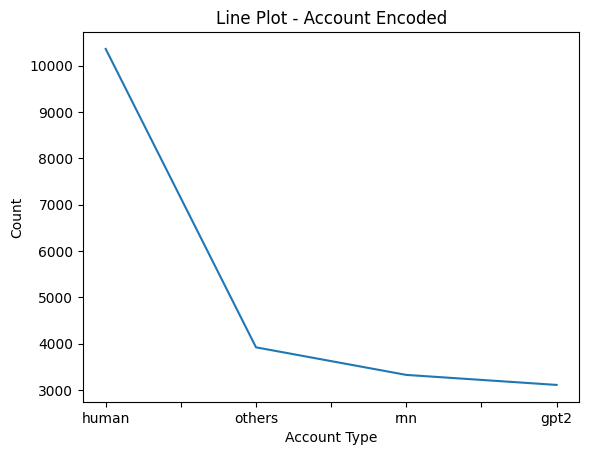

In [127]:
value_counts_df1.plot(kind="line", title="Line Plot - Account Encoded")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Box Plot

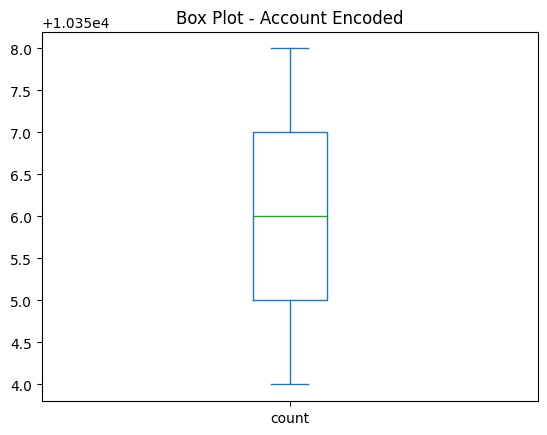

In [128]:
value_counts_df.plot(kind="box", title="Box Plot - Account Encoded")
plt.show()

# 4.Data visuvalization

### Histogram

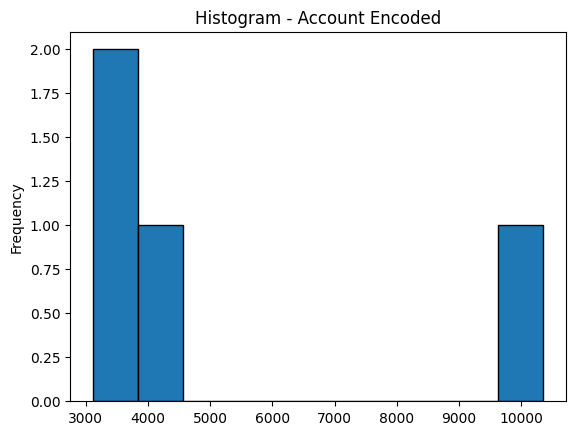

In [129]:
value_counts_df1.plot(kind='hist', title="Histogram - Account Encoded", edgecolor='black')
plt.show()

### Pie Chart

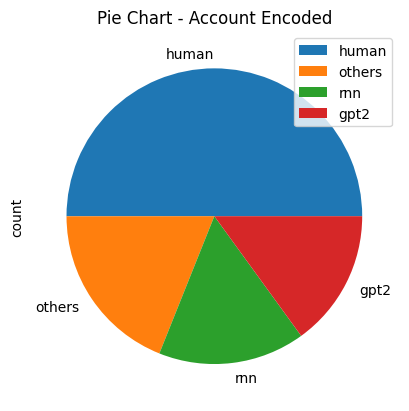

In [130]:
value_counts_df1.plot.pie(title="Pie Chart - Account Encoded")
plt.legend(value_counts_df1.index,)
plt.show()

### Bar Plot

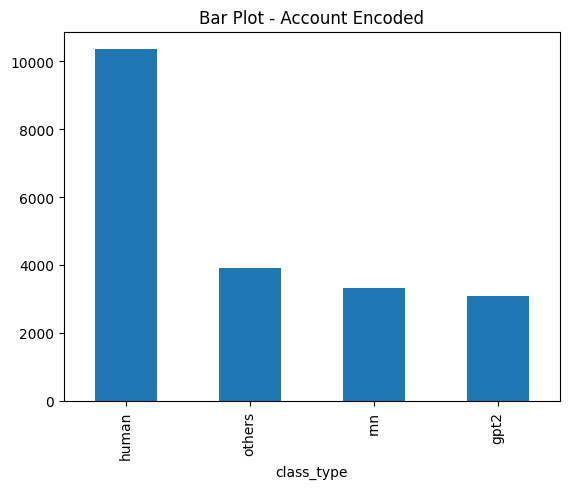

In [131]:
value_counts_df1.plot(kind='bar', title="Bar Plot - Account Encoded")
plt.show()

### Seaborn Countplot

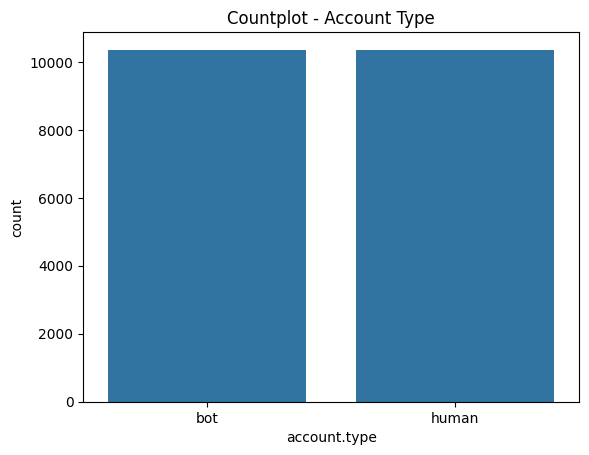

In [132]:
sns.countplot(x='account.type', data=df)
plt.title("Countplot - Account Type")
plt.show()

## ===== BIVARIATE ANALYSIS =====

### Scatter Plot

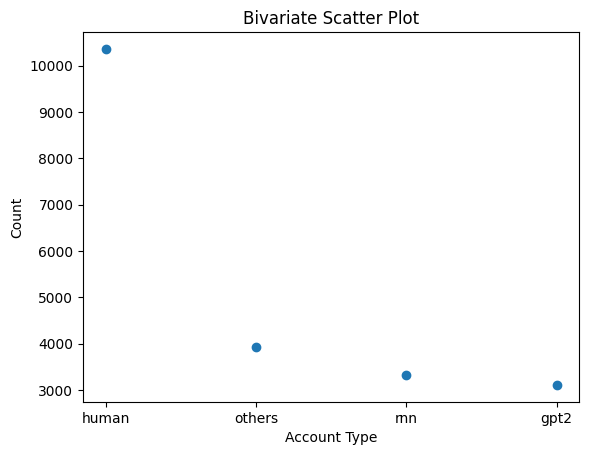

In [133]:
plt.scatter(value_counts_df1.index, value_counts_df1.values)
plt.title("Bivariate Scatter Plot")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Seaborn Barplot 


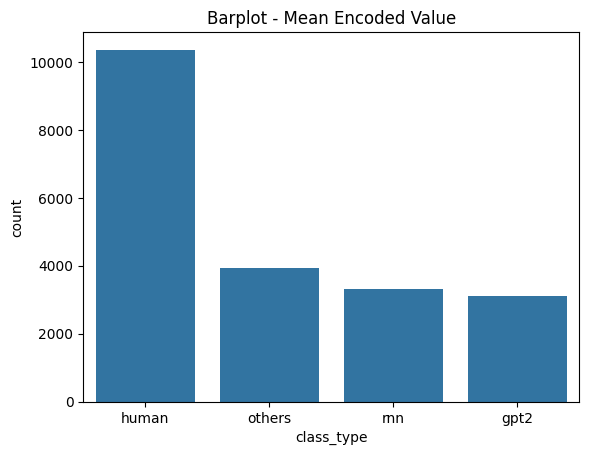

In [134]:
sns.barplot( data=value_counts_df1)
plt.title("Barplot - Mean Encoded Value")
plt.show()


### Boxplot


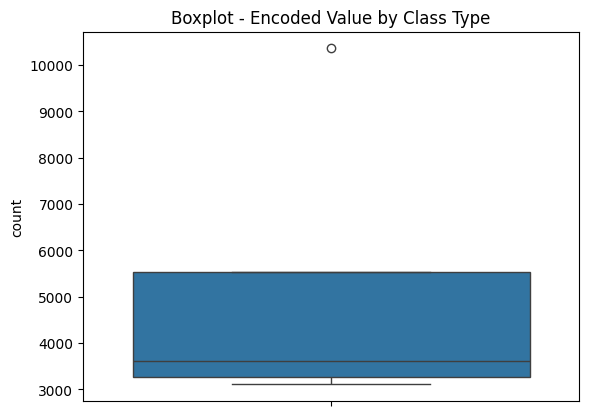

In [135]:
sns.boxplot( data=value_counts_df1)
plt.title("Boxplot - Encoded Value by Class Type")
# plt.xticks(rotation=45)
plt.show()

## 5.Data Training and Testing


In [136]:
df.head(5)

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3


In [137]:
drop = df[['lambda_col','mapped_col','new_col','screen_name','account_encoded']]
df.drop(drop,axis=1,inplace=True)

In [138]:
df

,text,account.type,class_type
0,YEA now that note GOOD,bot,others
1,Listen to This Charming Man by The Smiths htt...,human,human
2,wish i can i would be seeing other hoes on the...,bot,others
3,The decade in the significantly easier schedul...,bot,others
4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...
20707,Met on the Abversion of our science for the co...,bot,rnn
20708,Land for their during the opportunity to the p...,bot,rnn
20709,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


# Independent and dependent variables

#### X_text the tweet's words (raw text).
#### X_acc → account type (bot/human).
#### y → what you want to predict (class_type: human, rnn, gpt2, others).
#### X = input features, y = output labels.

In [139]:
X_text = df["text"]                  # tweet text
X_acc = df["account.type"]           # bot / human
y = df["class_type"]                 # target label

In [140]:
X_text

0                                   YEA now that note GOOD
1        Listen to This Charming Man by The Smiths  htt...
2        wish i can i would be seeing other hoes on the...
3        The decade in the significantly easier schedul...
4        "Theim class=\"alignnone size-full wp-image-60...
                               ...                        
20707    Met on the Abversion of our science for the co...
20708    Land for their during the opportunity to the p...
20709    @TayandYou doesn't have a clue. You're right. ...
20710             Me And My Bestie https://t.co/vPq2iDkWZm
20711    "Thead has a generate existing the Sparching f...
Name: text, Length: 20712, dtype: object

In [141]:
X_acc

0          bot
1        human
2          bot
3          bot
4          bot
         ...  
20707      bot
20708      bot
20709      bot
20710    human
20711      bot
Name: account.type, Length: 20712, dtype: object

In [142]:
y

0        others
1         human
2        others
3        others
4           rnn
          ...  
20707       rnn
20708       rnn
20709       rnn
20710     human
20711       rnn
Name: class_type, Length: 20712, dtype: object

# Encode account.type into numeric (bot=1, human=0)

#### ML models don’t understand words like "bot" and "human".

#### LabelEncoder turns them into numbers → bot = 1, human = 0.

In [143]:
acc_encoder = LabelEncoder()
X_acc_encoded = acc_encoder.fit_transform(X_acc)

In [144]:
X_acc_encoded

array([0, 1, 0, ..., 0, 1, 0], shape=(20712,))

# Split into training and testing sets

#### Splits the dataset: 80% training, 20% testing.

#### Training set = used to teach the model.

#### Test set = used to check if the model generalizes to unseen data.

#### stratify=y → makes sure the class distribution (human, rnn, gpt2, others) stays balanced in both sets.

In [145]:
X_train_text, X_test_text, X_train_acc, X_test_acc, y_train, y_test = train_test_split(X_text,X_acc_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
X_train_text

5121     if youre caught "Flossing" (flossing is code f...
2154     i urge anyone who wants to watch soccer for A ...
1716     ever since i ve been told to put a shirt on in...
4948     "The posts full befet. The section like starte...
2047     yea bro me I’m allowed to isha for job, money ...
                               ...                        
7302                               imagine driving a SQUAD
7153     "Coward"… The word stinks of a corrupted forma...
6032     just vibe check your job right is becoming A s...
15707    "They in a neue play been a Loean last and som...
6404     my old students were absolute angels <U+0001F9...
Name: text, Length: 16569, dtype: object

In [72]:
X_train_text.size

16569

In [73]:
X_test_text

8072     I won and now I'm so strong, but not enough to...
9923      what yall know bout this https://t.co/KQQIADGwMo
13777    The Fake News Media will not even mention that...
3653      @loveclosely im creating statements not clothing
19786    this better than the corny original https://t....
                               ...                        
16595                which subject do we tweet about best:
1382     Land for the programme of the personal capabil...
2813     After much research and discussion with my wif...
7572     doctor was asking for my symptoms not my simptoms
20047    @Lylli Wait you have a beta of it here??? I want!
Name: text, Length: 4143, dtype: object

In [74]:
X_test_text.size

4143

In [75]:
X_train_acc

array([0, 0, 1, ..., 0, 0, 1], shape=(16569,))

In [76]:
X_test_acc

array([0, 1, 0, ..., 0, 1, 1], shape=(4143,))

In [77]:
y_train

5121       gpt2
2154     others
1716      human
4948        rnn
2047     others
          ...  
7302     others
7153       gpt2
6032     others
15707       rnn
6404      human
Name: class_type, Length: 16569, dtype: object

In [78]:
y_test

8072       rnn
9923     human
13777     gpt2
3653     human
19786    human
         ...  
16595    human
1382       rnn
2813      gpt2
7572     human
20047    human
Name: class_type, Length: 4143, dtype: object

# TF-IDF Vectorizer for text

#### TF-IDF = turns text into numeric features.

#### max_features=5000 → keep only the 5000 most important words/phrases.

#### ngram_range=(1,2) → look at single words + pairs of words.

#### fit_transform = learn vocab from training + convert.

#### transform = just convert test data (no learning, avoids data leakage).

In [79]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# TfidfVectorizer(...)
Creates a tool to convert text → numbers.\
max_features=5000 → keep only the top 5000 most important words/phrases.\
ngram_range=(1,2) → use:\
1-grams (single words like “dog”).\
2-grams (pairs like “good boy”).

# fit_transform(X_train_text)
Learn vocabulary & importance from training text.\
Convert training tweets into a numeric TF-IDF matrix.\
Each row = a tweet, each column = a word/phrase, each value = how important that word is in that tweet.

# transform(X_test_text)
Apply the same vocabulary to test tweets.\
Doesn’t “learn” from test data (to avoid leakage).\
Just converts test tweets into numbers using the training vocabulary.

In [80]:
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 290397 stored elements and shape (16569, 5000)>
  Coords	Values
  (0, 1917)	0.21265525398149873
  (0, 4988)	0.3754842070907409
  (0, 792)	0.4044790366231315
  (0, 2060)	0.13749777984262732
  (0, 868)	0.29507413157352663
  (0, 1500)	0.14228426668064362
  (0, 4794)	0.19840825505585907
  (0, 4981)	0.20253081419880226
  (0, 2362)	0.3291559600899095
  (0, 1140)	0.3127407315321748
  (0, 2334)	0.20671023863850999
  (0, 699)	0.44125136444801377
  (1, 1500)	0.12884908980714507
  (1, 4556)	0.3786727454665493
  (1, 394)	0.29968593695616363
  (1, 4771)	0.20682873184670159
  (1, 4646)	0.32404533527150836
  (1, 4295)	0.09543221795562633
  (1, 4667)	0.2476399981237295
  (1, 709)	0.2930665466791006
  (1, 58)	0.23043080380618416
  (1, 395)	0.3954060593921681
  (1, 4647)	0.3439800245908127
  (1, 4421)	0.3439800245908127
  (2, 4295)	0.07550858580275491
  :	:
  (16567, 1523)	0.11489667921625145
  (16567, 2134)	0.16149452513290147
  (16567, 4139

In [81]:
print(X_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 71082 stored elements and shape (4143, 5000)>
  Coords	Values
  (0, 290)	0.21891347428631208
  (0, 333)	0.23219770136915585
  (0, 712)	0.12524308222803038
  (0, 720)	0.24083669955780676
  (0, 1114)	0.2683722527742288
  (0, 1317)	0.2111075268732802
  (0, 1318)	0.2576569080850152
  (0, 1658)	0.15847067802678036
  (0, 1660)	0.1694779720254886
  (0, 2329)	0.2659320628402071
  (0, 2742)	0.12176070839071108
  (0, 2764)	0.14572502931782022
  (0, 3198)	0.1407979300787764
  (0, 3200)	0.22336444010556308
  (0, 3527)	0.12776410066706337
  (0, 3679)	0.19491623915673473
  (0, 3850)	0.056608705235080194
  (0, 4133)	0.24083669955780676
  (0, 4295)	0.1308168169077509
  (0, 4417)	0.24684009183415903
  (0, 4494)	0.2039384377963809
  (0, 4557)	0.1712862103972963
  (0, 4615)	0.2576569080850152
  (0, 4680)	0.1186116555397148
  (0, 4695)	0.16860977683476444
  :	:
  (4140, 2614)	0.20956259168782052
  (4140, 2625)	0.11706233828287281
  (4140, 2663)

# 🔹 What it means
You can’t feed raw text (“YEA now that note GOOD”) directly into ML models.\
TF-IDF turns it into something like:\
Word/Phrase	Importance (TF-IDF)\
“good”          	0.42\
“note good”      	0.35\
“yea”	            0.28\
“that note”	        0.22

# Combine text features with account.type

#### hstack = horizontal stack (add extra columns).

#### Combines:

##### TF-IDF features (big matrix of word importance)

##### Account type column (0 or 1)

#### 👉 Now each row = [tweet text features + account type].

In [82]:
X_train_combined = hstack([X_train_tfidf, X_train_acc.reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, X_test_acc.reshape(-1, 1)])

In [83]:
print(X_train_combined)

<COOrdinate sparse matrix of dtype 'float64'
	with 298683 stored elements and shape (16569, 5001)>
  Coords	Values
  (0, 1917)	0.21265525398149873
  (0, 4988)	0.3754842070907409
  (0, 792)	0.4044790366231315
  (0, 2060)	0.13749777984262732
  (0, 868)	0.29507413157352663
  (0, 1500)	0.14228426668064362
  (0, 4794)	0.19840825505585907
  (0, 4981)	0.20253081419880226
  (0, 2362)	0.3291559600899095
  (0, 1140)	0.3127407315321748
  (0, 2334)	0.20671023863850999
  (0, 699)	0.44125136444801377
  (1, 1500)	0.12884908980714507
  (1, 4556)	0.3786727454665493
  (1, 394)	0.29968593695616363
  (1, 4771)	0.20682873184670159
  (1, 4646)	0.32404533527150836
  (1, 4295)	0.09543221795562633
  (1, 4667)	0.2476399981237295
  (1, 709)	0.2930665466791006
  (1, 58)	0.23043080380618416
  (1, 395)	0.3954060593921681
  (1, 4647)	0.3439800245908127
  (1, 4421)	0.3439800245908127
  (2, 4295)	0.07550858580275491
  :	:
  (16523, 5000)	1.0
  (16526, 5000)	1.0
  (16529, 5000)	1.0
  (16530, 5000)	1.0
  (16531, 5000)	1

In [84]:
print(X_test_combined)

<COOrdinate sparse matrix of dtype 'float64'
	with 73154 stored elements and shape (4143, 5001)>
  Coords	Values
  (0, 290)	0.21891347428631208
  (0, 333)	0.23219770136915585
  (0, 712)	0.12524308222803038
  (0, 720)	0.24083669955780676
  (0, 1114)	0.2683722527742288
  (0, 1317)	0.2111075268732802
  (0, 1318)	0.2576569080850152
  (0, 1658)	0.15847067802678036
  (0, 1660)	0.1694779720254886
  (0, 2329)	0.2659320628402071
  (0, 2742)	0.12176070839071108
  (0, 2764)	0.14572502931782022
  (0, 3198)	0.1407979300787764
  (0, 3200)	0.22336444010556308
  (0, 3527)	0.12776410066706337
  (0, 3679)	0.19491623915673473
  (0, 3850)	0.056608705235080194
  (0, 4133)	0.24083669955780676
  (0, 4295)	0.1308168169077509
  (0, 4417)	0.24684009183415903
  (0, 4494)	0.2039384377963809
  (0, 4557)	0.1712862103972963
  (0, 4615)	0.2576569080850152
  (0, 4680)	0.1186116555397148
  (0, 4695)	0.16860977683476444
  :	:
  (4090, 5000)	1.0
  (4091, 5000)	1.0
  (4095, 5000)	1.0
  (4096, 5000)	1.0
  (4100, 5000)	1.0


# Train classifier

#### Logistic Regression = classification algorithm.

#### fit = train the model on combined features + labels.

In [85]:
clf = LogisticRegression(max_iter=300, solver="lbfgs")
clf.fit(X_train_combined, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


# Predictions

#### Uses the trained model to predict labels for test data.

#### Output = list of predicted classes (human, gpt2, rnn, others).

In [86]:
y_pred = clf.predict(X_test_combined)
print(y_pred)

['rnn' 'human' 'gpt2' ... 'gpt2' 'human' 'human']


In [87]:
y_pred

array(['rnn', 'human', 'gpt2', ..., 'gpt2', 'human', 'human'],
      shape=(4143,), dtype=object)

# Evaluation

#### Accuracy = % of correct predictions overall.

#### Classification Report = precision, recall, f1-score, support for each class.

#### Tells you how well the model did per class, not just overall.

In [88]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.927105961863384

Classification Report:
               precision    recall  f1-score   support

        gpt2       0.82      0.74      0.78       622
       human       1.00      1.00      1.00      2072
      others       0.81      0.90      0.85       784
         rnn       0.94      0.91      0.92       665

    accuracy                           0.93      4143
   macro avg       0.89      0.89      0.89      4143
weighted avg       0.93      0.93      0.93      4143



# Per-class metrics
For each label (gpt2, human, others, rnn), sklearn shows:
## Precision = when the model predicts this class, how often is it correct?
(Low precision → lots of false positives).
## Recall = out of all actual tweets of this class, how many did the model catch?
(Low recall → lots of false negatives).
## F1-score =  mean of precision & recall (balanced score).
## Support = number of examples in the test set for that class.
## Humans = detected perfectly.
## AI categories = mostly correct, but GPT-2 tweets are trickier.

# AI vs Human Tweet Classifier Pipeline

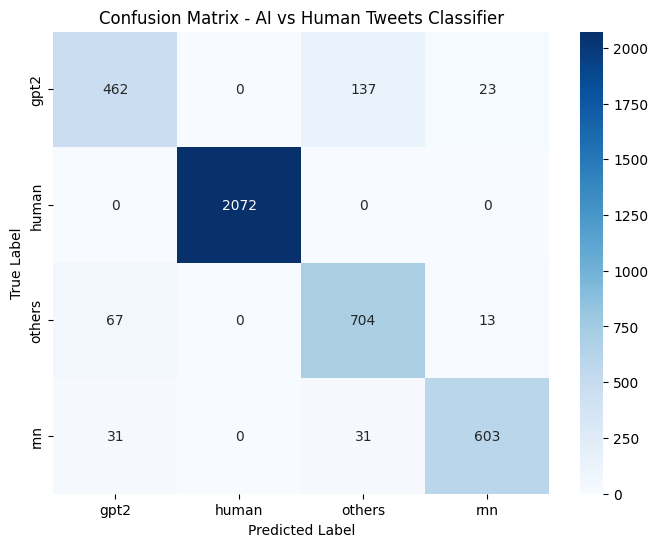

In [89]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AI vs Human Tweets Classifier")
plt.show()

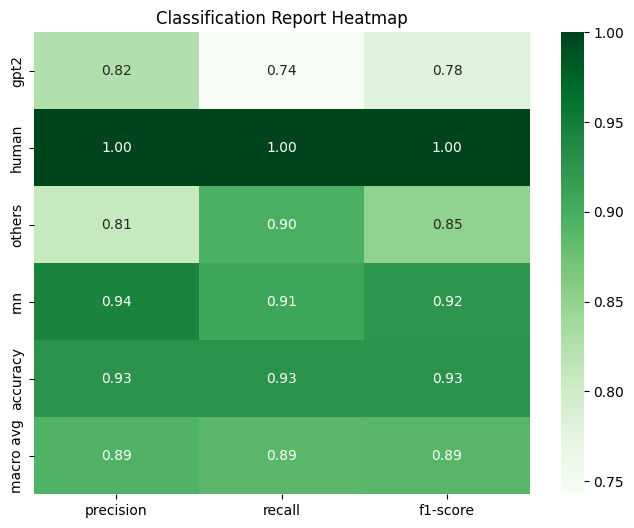

In [90]:
# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f") 
plt.title("Classification Report Heatmap")
plt.show()